DT ENSEMBLES: LOOKING AT DT, RANDOM FORESTS, XGBOOST

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from xgboost import XGBClassifier

RANDOM_STATE = 55

In [35]:
df = pd.read_csv('C:\\Users\\Lenovo\\OneDrive\\Desktop\\coursera_ml\\heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [10]:
#there are 5 categorical features so we have to one hot encode them

In [36]:
cat_variables = ['Sex',
'ChestPainType',
'RestingECG',
'ExerciseAngina',
'ST_Slope'
]   #name of the cat features

In [42]:
df1 = pd.get_dummies(data=df, prefix=cat_variables, columns=cat_variables, dtype=int)

In [43]:
df1.head()   #HeartDisease is in the middle of the df now 

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [113]:
y = df.to_numpy()[:, 11]
print(y)

[0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1
 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0
 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0
 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0
 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0
 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 

In [32]:
#pandas has a func get_dummies() to return a df with one hot 
#encoding of cat features 

In [153]:
x = df1[[x for x in df1.columns if x not in 'HeartDisease']].to_numpy()
print(x)

[[ 40. 140. 289. ...   0.   0.   1.]
 [ 49. 160. 180. ...   0.   1.   0.]
 [ 37. 130. 283. ...   0.   0.   1.]
 ...
 [ 57. 130. 131. ...   0.   1.   0.]
 [ 57. 130. 236. ...   0.   1.   0.]
 [ 38. 138. 175. ...   0.   0.   1.]]


In [159]:
m = x.shape[0]
n = x.shape[1]
print(m,n)

918 20


In [165]:
features = [x for x in df1.columns if x not in 'HeartDisease']

In [166]:
x_train, x_test, y_train, y_test = train_test_split(df1[features], df1['HeartDisease'], test_size=0.2, random_state=RANDOM_STATE)

In [167]:
print(x_train)
print(x_train.shape)

     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  Sex_F  Sex_M  \
309   57         95            0          1    182      0.7      0      1   
30    53        145          518          0    130      0.0      0      1   
869   59        150          212          1    157      1.6      0      1   
159   54        160          195          0    130      1.0      0      1   
307   53        130            0          0    120      0.7      0      1   
..   ...        ...          ...        ...    ...      ...    ...    ...   
541   76        104          113          0    120      3.5      0      1   
893   57        154          232          0    164      0.0      0      1   
295   61        105            0          1    110      1.5      0      1   
666   52        128          205          1    184      0.0      0      1   
461   63        136            0          0     84      0.0      0      1   

     ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  \
309        

In [ ]:
#there are two hperparam that will be worked with here, 
#min_samples_split which is the min no of samples needed to split an internal node
#chossing a high value of min

In [157]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] # If the number is an integer, then it is the actual quantity of samples,
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None]  # None means no depth lim

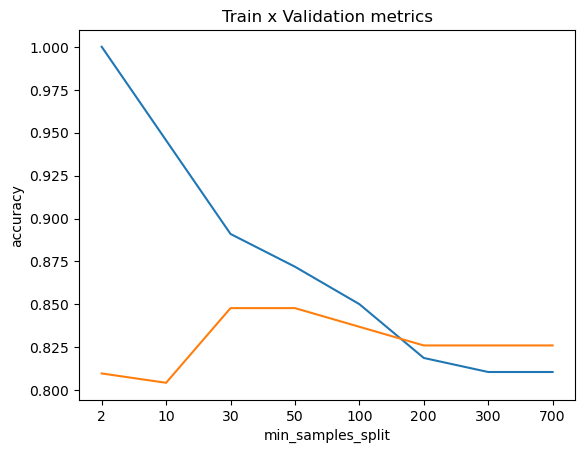

In [169]:
#looking at accuracy of diff DT with diff min_sample_split values

accuracy_list_train = []
accuracy_list_test = []

for i in min_samples_split_list:
    model = DecisionTreeClassifier(min_samples_split=i, random_state=RANDOM_STATE).fit(x_train, y_train)
    p_train = model.predict(x_train)
    p_test = model.predict(x_test)
    acc_train = accuracy_score(p_train, y_train)
    acc_test = accuracy_score(p_test, y_test)
    accuracy_list_train.append(acc_train)
    accuracy_list_test.append(acc_test)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)

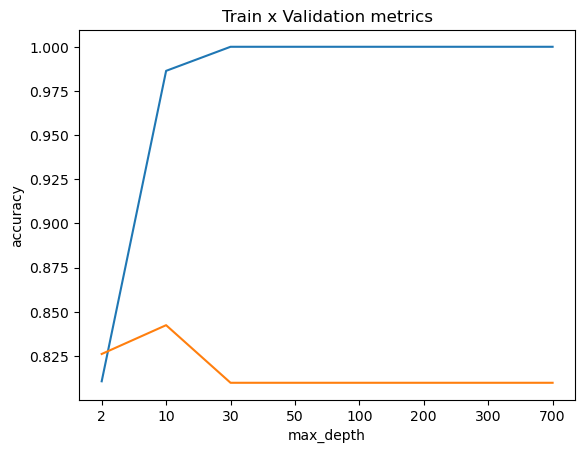

In [171]:
#based on the max depth, the models can be compared as follows
accuracy_list_train = []
accuracy_list_test = []

for i in min_samples_split_list:
    model = DecisionTreeClassifier(max_depth=i, random_state=RANDOM_STATE).fit(x_train, y_train)
    p_train = model.predict(x_train)
    p_test = model.predict(x_test)
    acc_train = accuracy_score(p_train, y_train)
    acc_test = accuracy_score(p_test, y_test)
    accuracy_list_train.append(acc_train)
    accuracy_list_test.append(acc_test)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)

That was for a single DT, now looking at RF

In [172]:
#RF is similar in implementation to DT, but it has some more hyperparameters, 

#n_estimators: the number of DT in the RF

#max_features: for RF, we let the individual DTs to only work with root(n) features and that value can be explicitly
#put by specifying the arg to the max_features param

#n_jobs: number of cores that will be used up 

In [173]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]  
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500]

#the vals passed to these hyperparams, if they are ints then they represent the actual number of samples, and if
#they are float then they represent the percentage wrt original training set

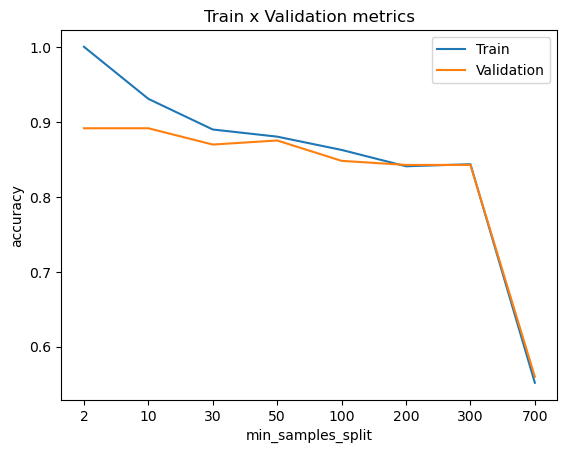

In [174]:
#checking the models based on min_samples_split
accuracy_list_train = []
accuracy_list_test = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(x_train,y_train) 
    predictions_train = model.predict(x_train) ## The predicted values for the train dataset
    predictions_test = model.predict(x_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

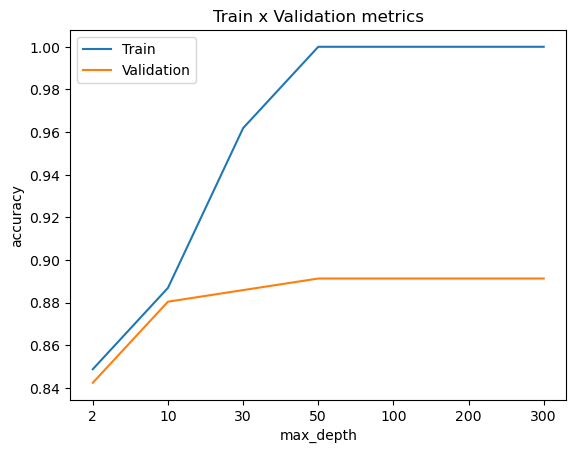

In [175]:
#chekcing the models based on max_depth
accuracy_list_train = []
accuracy_list_test = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_depth=max_depth,
                                   random_state = RANDOM_STATE).fit(x_train,y_train) 
    predictions_train = model.predict(x_train) ## The predicted values for the train dataset
    predictions_test = model.predict(x_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

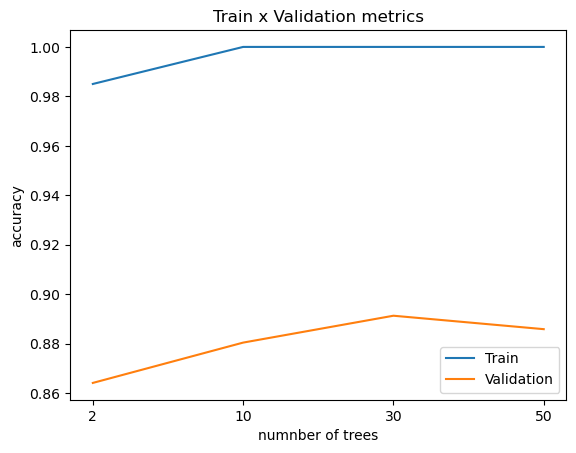

In [176]:
#based on n_estimators or the number of trees
accuracy_list_train = []
accuracy_list_test = []
for n_est in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators=n_est,
                                   random_state = RANDOM_STATE).fit(x_train,y_train) 
    predictions_train = model.predict(x_train) ## The predicted values for the train dataset
    predictions_test = model.predict(x_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('numnber of trees')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

In [ ]:
#best one chosen is with combination: max_depth: 16, min_samples_split: 10, n_estimators: 100

#we would ideally want to try out all the combinations, say we have 4 vals from each hyperparam to try out then that
#results in 4*4*4 or 64 combinations, this can be done using sklearns GridSearchCV which 

XGBoost

In [177]:
#this is similar to RF but instead of the trees being uncorrelated to each other they are trained one after the other 
#where the next DT gets more of the samples which the prev DT misclassified 

#note: trees within ensembles are also known as estimators 

In [178]:
x_train_fit, x_eval, y_train_fit, y_eval = train_test_split(x_train, y_train, test_size=0.2, random_state=RANDOM_STATE)

In [186]:
#XGBoost will check the error with a eval set which is derived from the training set itself, and hence the training
#set also needs to be further split in this case, and if it sees that this error is inc or does not improve, it 
#stops training on its own

xgb_model = XGBClassifier(n_estimators=500, learning_rate=0.1, verbosity=1, random_state = RANDOM_STATE, early_stopping_rounds= 10)
xgb_model.fit(x_train_fit, y_train_fit, eval_set=[(x_eval, y_eval)])

[0]	validation_0-logloss:0.64379
[1]	validation_0-logloss:0.61227
[2]	validation_0-logloss:0.57987
[3]	validation_0-logloss:0.55726
[4]	validation_0-logloss:0.53572
[5]	validation_0-logloss:0.51911
[6]	validation_0-logloss:0.50419
[7]	validation_0-logloss:0.48945
[8]	validation_0-logloss:0.48012
[9]	validation_0-logloss:0.46953
[10]	validation_0-logloss:0.46610
[11]	validation_0-logloss:0.46085
[12]	validation_0-logloss:0.45447
[13]	validation_0-logloss:0.44876
[14]	validation_0-logloss:0.44477
[15]	validation_0-logloss:0.44325
[16]	validation_0-logloss:0.43825
[17]	validation_0-logloss:0.43583
[18]	validation_0-logloss:0.43509
[19]	validation_0-logloss:0.42989
[20]	validation_0-logloss:0.42617
[21]	validation_0-logloss:0.42378
[22]	validation_0-logloss:0.42152
[23]	validation_0-logloss:0.41876
[24]	validation_0-logloss:0.41771
[25]	validation_0-logloss:0.41913
[26]	validation_0-logloss:0.41941
[27]	validation_0-logloss:0.41903
[28]	validation_0-logloss:0.42009
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=55, ...)

In [187]:
xgb_model.best_iteration   #lowest log loss was obtained at 25th iteration and the model waited for 10 ish more iterations to stop
#the algo since after that the loss was only increasing

24

In [189]:
a = np.array([1,2])
print(sum(a))
print(len(a))

3
2
